In [1]:
#imports

import pandas as pd
import sklearn
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
#Setting up the dataframes
data = pd.read_csv("student-mat.csv" , sep=";")
data = data[["G1" , "G2" , "G3" , "studytime" , "failures" , "absences"]]
data.head()# displays the dataframes

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


Predictions made:- 
[10 18 18  8 17  6 13 13 10  6 13  4 15 -1 -1  8  4 12  3  9 13  5  9 13
 14 11  6 13 15  8 11 10 16 12 15 10 10 14 16 16]
-----------------------------------
Actual Values:- 
[11 18 19  8 18  6 15 13 10  6 13  5 16  0  0  8  0 11  0 11 13  6 10 13
 14 12  9 13 15  8 11  9 16 12 16 10 10 14 15 16]
Model Score-95.46550018434581,
Model Coef - [ 0.16007655  0.96937593 -0.18492814 -0.23494818  0.03668432],
Model Intercept--1.487253532938043


Text(0, 0.5, 'G3')

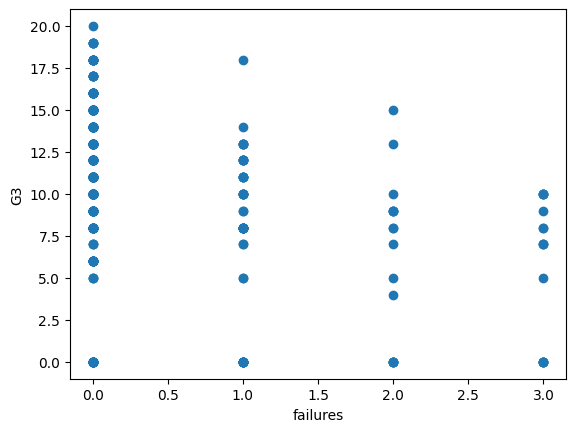

In [ ]:
from sklearn.model_selection import train_test_split
predict = "G3"

x = np.array(data.drop([predict],axis = 1))
y = np.array(data[predict])
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1)

best = 0
for i in range(30):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1)

  model2 = LinearRegression()#by this we are creating a blueprint of the linear regression model.

  model2.fit(x_train,y_train)# this generates the values of m(slopes) and the intecept b by using the training data

  score = model2.score(x_test,y_test) #Evaluates the accuracy or effectiveness of the trained model (closer to 1 - good model,
                                                                                                    #closer to 0 - bad model )
  #print(score)
'''
  if score>best:
    best = score
    model_file =  open("model.pickle","wb")
    pickle.dump(model2,model_file)
    model_file.close()

    test_file = open("test_file.pickle","wb")
    pickle.dump((x_test,y_test),test_file)
    test_file.close()
print("______________________________________________________________")
print(best*100)
'''

file3 = open("model.pickle","rb")
model2 = pickle.load(file3)
file3.close()
file4 = open("test_file.pickle","rb")
x_test,y_test = pickle.load(file4)

prediction = model2.predict(x_test)
prediction_ar = np.round(prediction)
prediction_ar = prediction_ar.astype(int)
print("Predictions made:- ")
print(prediction_ar)
print("-----------------------------------")
print("Actual Values:- ")
print(y_test)
print(f"Model Score-{100*model2.score(x_test,y_test)},\nModel Coef - {model2.coef_},\nModel Intercept-{model2.intercept_}")

p="failures"
#plt.style.use("ggplot")
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("G3")



#best output -
#Best Score - 95.46550018434581
#Predictions made:-
#[10 18 18  8 17  6 13 13 10  6 13  4 15 -1 -1  8  4 12  3  9 13  5  9 13
# 14 11  6 13 15  8 11 10 16 12 15 10 10 14 16 16]
#-----------------------------------
#Actual Values:-
#[11 18 19  8 18  6 15 13 10  6 13  5 16  0  0  8  0 11  0 11 13  6 10 13
# 14 12  9 13 15  8 11  9 16 12 16 10 10 14 15 16]
#Model Score-95.46550018434581,
#Model Coef - [ 0.16007655  0.96937593 -0.18492814 -0.23494818  0.03668432],
#Model Intercept--1.487253532938043
#Text(0, 0.5, 'G3')

